In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats as sp

## 데이터 불러오기

In [3]:
boston = load_boston()

In [4]:
dfX0 = pd.DataFrame(data=boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(data=boston.target, columns=["MEDV"])

In [5]:
dfX0.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
dfX = sm.add_constant(dfX0)

In [7]:
dfX.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 원데이터 사용 회귀모델

In [8]:
df0 = pd.concat([dfX0, dfy], axis=1)

In [9]:
model = sm.OLS(dfy, dfX)

In [10]:
result = model.fit()

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          6.95e-135
Time:                        11:49:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

## 데이터 탐색 - Histogram(Original Data vs Log변환 Data)

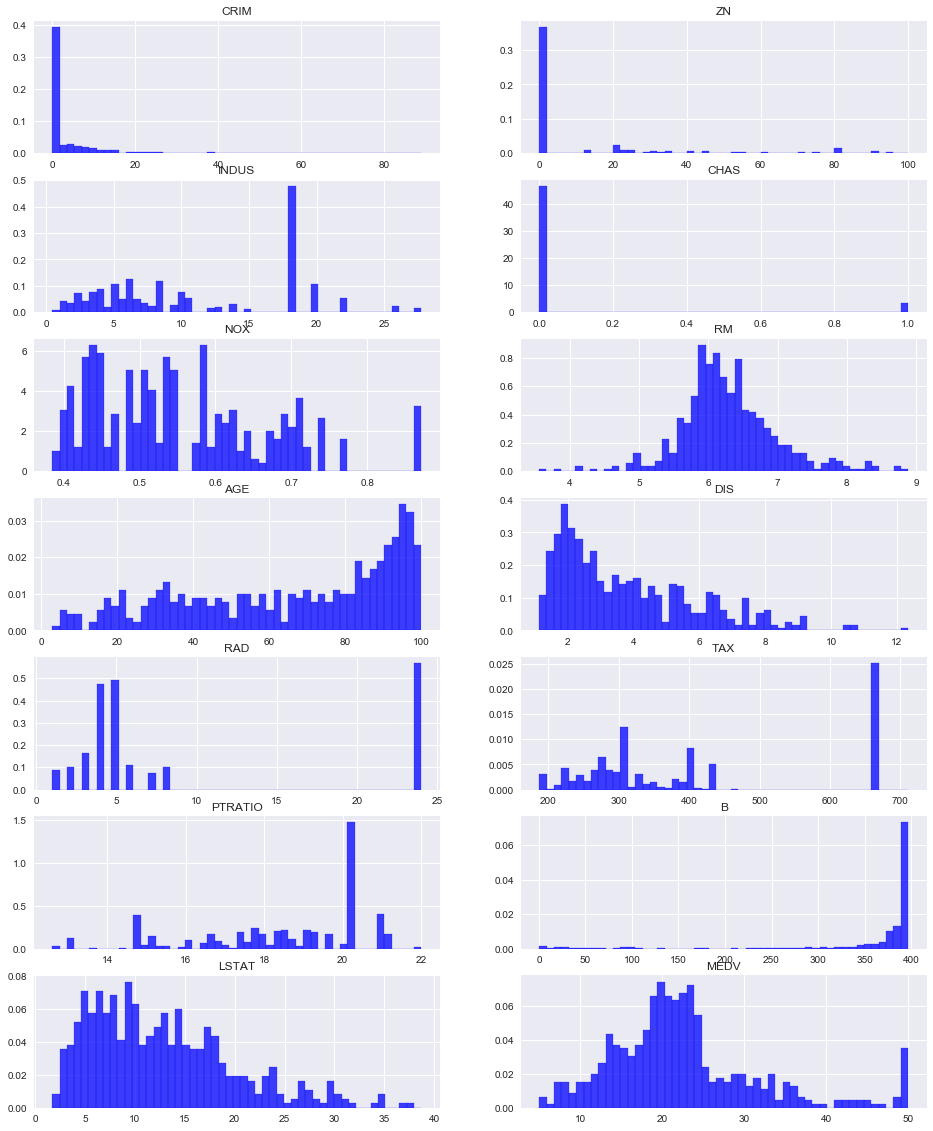

In [12]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 20))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(df0.iloc[:,idx]) - min(df0.iloc[:,idx])) / 50
    ax.hist(df0.iloc[:,idx], 
            bins=np.arange(min(df0.iloc[:,idx]),
                                            max(df0.iloc[:,idx]) + binwidth, binwidth),
           alpha=0.75, color='b', edgecolor='b', normed=True)
    ax.set_title(df0.columns[idx])
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log


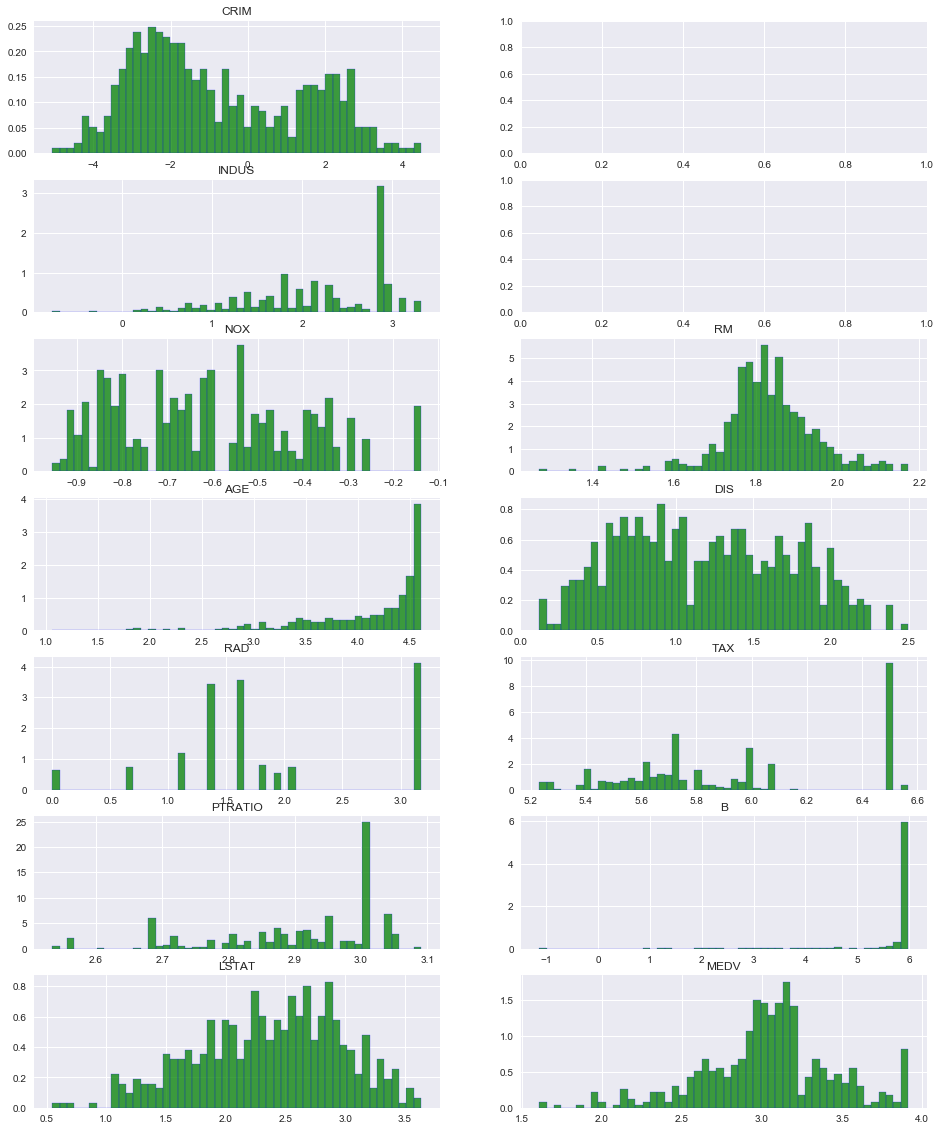

In [13]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 20))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    try:
        ax.figure
        ax.hist(np.log(df0.iloc[:,idx]), bins=50, alpha=0.75, color='g', edgecolor='b', normed=True)
        ax.set_title(df0.columns[idx])
    except:
        pass
plt.show()

In [14]:
['CRIM' 'DIS', 'LSTAT']

['CRIMDIS', 'LSTAT']

In [15]:
dfX2 = dfX.copy()

In [16]:
dfX2['CRIM'] = np.log(dfX2['CRIM'])
dfX2['DIS'] = np.log(dfX2['DIS'])
dfX2['LSTAT'] = np.log(dfX2['LSTAT'])

- Log를 취했을 때 정규분포를 보이는 feature에 Log값 적용

In [17]:
model_log = sm.OLS(dfy, dfX2)
result_log = model_log.fit()
print(result_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     143.6
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          5.37e-158
Time:                        11:49:18   Log-Likelihood:                -1443.7
No. Observations:                 506   AIC:                             2915.
Df Residuals:                     492   BIC:                             2975.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         58.6043      5.024     11.665      0.0

- R-squared : 0.791까지 상승

## 과최적화를 막기위한 feature 갯수 축소 및 다중공선성 제거

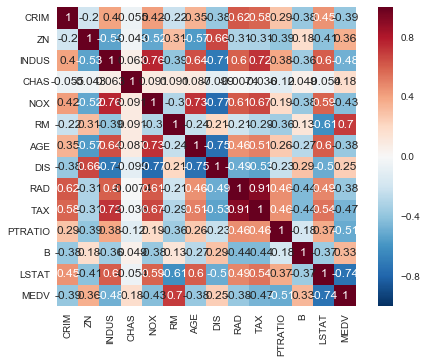

In [18]:
corrmat = df0.corr()
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

In [ ]:
feature1_col = ['RAD', 'TAX']
feature2_col = ['INDUS', 'DIS', 'NOX', 'AGE']

- 'RAD & TAX' / 'INDUS & DIS & NOX & AGE' 강한 상관관계 존재

In [24]:
scaler = StandardScaler()

In [25]:
dfX3 = pd.DataFrame(scaler.fit_transform(dfX2.ix[:,1:]), columns=dfX2.columns[1:])

In [26]:
dfX3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.984813,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.409104,-0.982843,-0.666608,-1.459000,0.441052,-1.275260
1,-1.305816,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.769562,-0.867883,-0.987329,-0.303094,0.441052,-0.263711
2,-1.306156,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.769562,-0.867883,-0.987329,-0.303094,0.396427,-1.627858
3,-1.226955,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.139194,-0.752922,-1.106115,0.113032,0.416163,-2.153192
4,-0.875472,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.139194,-0.752922,-1.106115,0.113032,0.441052,-1.162114


In [27]:
feature1 = pd.DataFrame(data=PCA(1).fit_transform(dfX3[feature1_col]), columns=['feature1'])
feature2 = pd.DataFrame(data=PCA(1).fit_transform(dfX3[feature2_col]), columns=['feature2'])

- 스케일링 후 변수 축소

In [28]:
dfX4 = pd.concat([dfX3, feature1, feature2], axis=1)

In [29]:
del dfX4['RAD'], dfX4['TAX'], dfX4['INDUS'], dfX4['DIS'], dfX4['NOX'], dfX4['AGE'], dfX4['ZN'], dfX4['CRIM']

In [30]:
dfX4.head()

,CHAS,RM,PTRATIO,B,LSTAT,feature1,feature2
0,-0.272599,0.413672,-1.459000,0.441052,-1.275260,-1.166338,-0.969456
1,-0.272599,0.194274,-0.303094,0.441052,-0.263711,-1.311833,-0.888719
2,-0.272599,1.282714,-0.303094,0.396427,-1.627858,-1.311833,-1.194477
3,-0.272599,1.016303,0.113032,0.416163,-2.153192,-1.314538,-2.044146
4,-0.272599,1.228577,0.113032,0.441052,-1.162114,-1.314538,-1.899856


In [31]:
dfX4 = sm.add_constant(dfX4)

In [32]:
model3 = sm.OLS(dfy, dfX4)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     219.6
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          8.96e-148
Time:                        12:24:53   Log-Likelihood:                -1484.1
No. Observations:                 506   AIC:                             2984.
Df Residuals:                     498   BIC:                             3018.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         22.5328      0.204    110.630      0.0

- R-squared는 감소하였지만 변수의 갯수 축소 및 다른 데이터의 Normality 상승

In [33]:
del dfX4['feature1']

- 설명력이 부족한 feautre1 삭제

In [34]:
model4 = sm.OLS(dfy, dfX4)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     256.1
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          8.02e-149
Time:                        12:24:55   Log-Likelihood:                -1484.5
No. Observations:                 506   AIC:                             2983.
Df Residuals:                     499   BIC:                             3013.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         22.5328      0.204    110.651      0.0

## 아웃라이어 제거

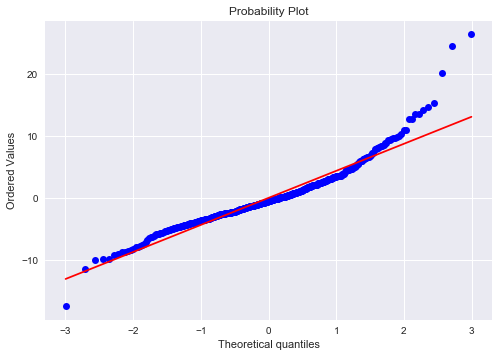

In [35]:
plt.figure()
sp.probplot(result4.resid, plot=plt)
plt.show()

In [36]:
influence = result4.get_influence()
cooks_d4, pvals = influence.cooks_distance
fox_cr = 0.007
idx = np.where(cooks_d4 < fox_cr)[0]
dfX5 = dfX4.iloc[idx, :]
dfy5 = dfy.iloc[idx]
df5 = pd.concat([dfX5, dfy5], axis=1)

In [37]:
dfX5 = sm.add_constant(dfX5)

In [38]:
model5 = sm.OLS(dfy5, dfX5)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     387.5
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          2.54e-176
Time:                        12:25:00   Log-Likelihood:                -1199.8
No. Observations:                 467   AIC:                             2414.
Df Residuals:                     460   BIC:                             2443.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         22.0189      0.149    148.230      0.0

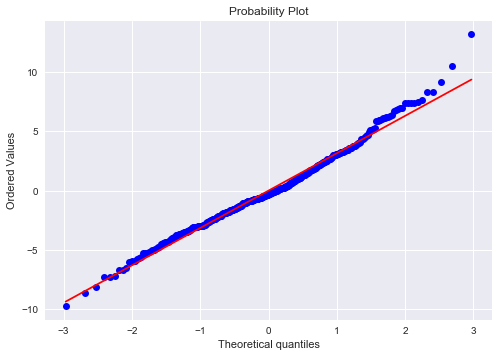

In [39]:
plt.figure()
sp.probplot(result5.resid, plot=plt)
plt.show()

- Fat tail 현상을 보이는 데이터 삭제

## Censored 데이터 제거

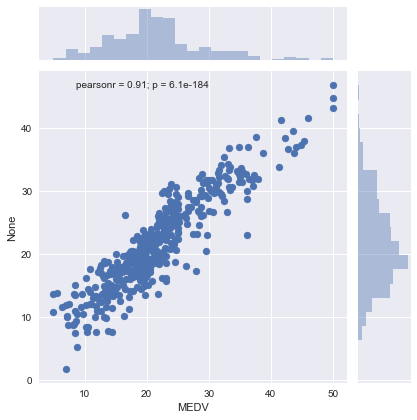

In [40]:
sns.jointplot(df5['MEDV'], result5.fittedvalues)
plt.show()

- 데이터가 50에서 막혀있는 모습이 존재

In [41]:
df6 = df5.copy()

In [42]:
df6 = df5[df5['MEDV'] < 49]
len(df6)

464

- 3개 데이터 삭제

In [43]:
model6 = sm.OLS(df6.iloc[:,-1], df6.iloc[:, :-1])
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     354.3
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          2.46e-168
Time:                        12:25:08   Log-Likelihood:                -1188.7
No. Observations:                 464   AIC:                             2391.
Df Residuals:                     457   BIC:                             2420.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.9533      0.149    147.241      0.0

In [44]:
del df6['feature2']

- 설명력이 부족한 feature2 삭제

In [45]:
df6.head()

,const,CHAS,RM,PTRATIO,B,LSTAT,MEDV
0,1,-0.272599,0.413672,-1.459000,0.441052,-1.275260,24.0
1,1,-0.272599,0.194274,-0.303094,0.441052,-0.263711,21.6
2,1,-0.272599,1.282714,-0.303094,0.396427,-1.627858,34.7
3,1,-0.272599,1.016303,0.113032,0.416163,-2.153192,33.4
4,1,-0.272599,1.228577,0.113032,0.441052,-1.162114,36.2


- Target Value 'MEDV' 정규화

In [59]:
df6['MEDV'] = scaler.fit_transform(df6['MEDV'])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [60]:
df6.head()

,const,CHAS,RM,PTRATIO,B,LSTAT,MEDV
0,1,-0.272599,0.413672,-1.459000,0.441052,-1.275260,0.343240
1,1,-0.272599,0.194274,-0.303094,0.441052,-0.263711,0.021279
2,1,-0.272599,1.282714,-0.303094,0.396427,-1.627858,1.778649
3,1,-0.272599,1.016303,0.113032,0.416163,-2.153192,1.604253
4,1,-0.272599,1.228577,0.113032,0.441052,-1.162114,1.979874


In [57]:
model7 = sm.OLS(df6.iloc[:,-1], df6.iloc[:, :-1])
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     424.7
Date:                Fri, 30 Jun 2017   Prob (F-statistic):          2.08e-169
Time:                        13:05:02   Log-Likelihood:                -257.21
No. Observations:                 464   AIC:                             526.4
Df Residuals:                     458   BIC:                             551.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0659      0.020      3.321      0.0

### 최종모델 R-squared:0.823, Adj. R-squared: 0.821, Cond. No:2.93